In [1]:
import os
from scipy import misc
import imageio
from itertools import chain

In [2]:
path = "//Users/Hilony/Downloads/face_data"
imageList = []

for root, dirs, files in os.walk(path):
    for img in files:
        imageList.append(list(chain.from_iterable(imageio.imread(os.path.join(path, str(img))))))

In [3]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

In [4]:
#Plotting an image-
def plotImg(image):
    #newList = []
    newList = [image[i:i+256] for i in range(0,len(image),256)]
    imshow(newList, cmap='gray')
    plt.show()

In [5]:
#Plotting multiple images-
def plotMultipleImgs(image,n,m):
    total = n*m
    for t in range(total):
        im = image[t]
        plt.subplot(n,m, t+1)
        newList1 = [im[i:i+256] for i in range(0,len(im),256)]
        plt.imshow(newList1, cmap='gray')
    

In [6]:
print(len(imageList))
print(len(imageList[0]))
print(type(imageList[0]))

177
65536
<class 'list'>


In [7]:
#There are total 177 images
#each image has 256 rows and 256 columns
#Divide training and testing dataset
trainImg = imageList[:157]
testImg = imageList[157:]
print(len(trainImg))
print(len(testImg))

157
20


In [8]:
from matplotlib.pyplot import imshow

In [9]:
mean = []
nTrain = 157

for x in zip(*trainImg):
    #sum(x)
    total = 0
    for i in x:
        #print(i)
        total += i
    mean.append(total/nTrain)
        
##print(mean)

In [10]:
len(mean)

65536

The mean image:


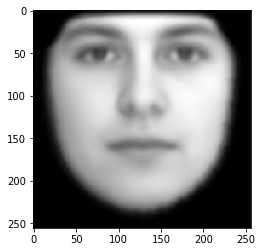

In [11]:
print("The mean image:")
plotImg(mean)


In [12]:
#Subtracting mean from all training images.
new = []
for imgs in range(0, len(trainImg)):
    t = trainImg[imgs]
    new.append([t[i] - mean[i] for i in range(0, 65536)])

In [13]:
import numpy as np

In [14]:
u, s, vh = np.linalg.svd(new, full_matrices=False)
##u #Unitary array(s). The first a.ndim - 2 dimensions have the same size as those of the input a. The size of the last two dimensions depends on the value of full_matrices. Only returned when compute_uv is True.
##s #Vector(s) with the singular values, within each vector sorted in descending order. The first a.ndim - 2 dimensions have the same size as those of the input a.
##vh #Unitary array(s). The first a.ndim - 2 dimensions have the same size as those of the input a. The size of the last two dimensions depends on the value of full_matrices. Only returned when compute_uv is True.

In [15]:
print(len(vh))
print(vh.shape[0])
print(vh.shape[1])
print(vh.shape)

157
157
65536
(157, 65536)


In [16]:
#for 30 faces-
#k=30
#nTrain = 157
#get first 30 faces
k30 = vh[:30]

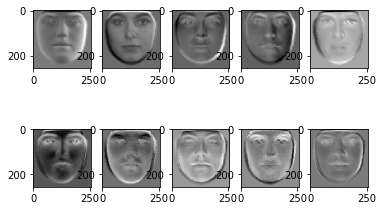

In [17]:
total = 10 # display 10 images together in one view-
n = 2
m = 5
plotMultipleImgs(k30,2,5)

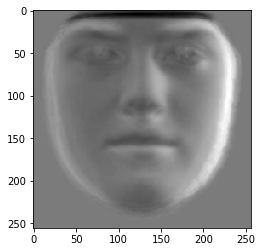

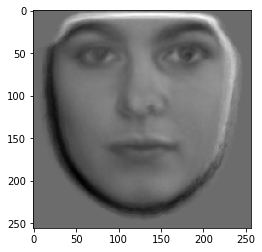

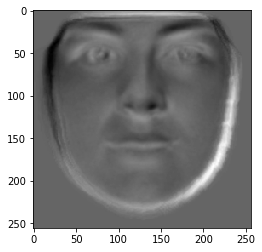

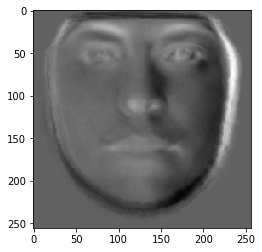

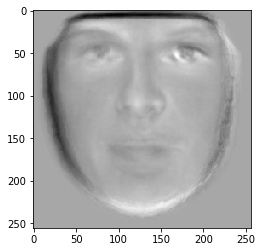

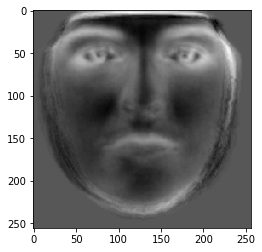

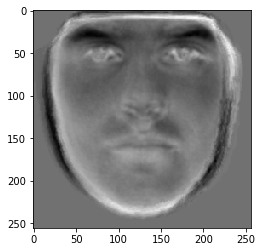

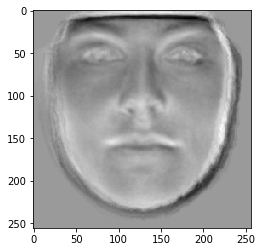

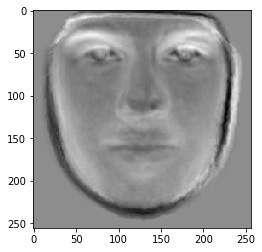

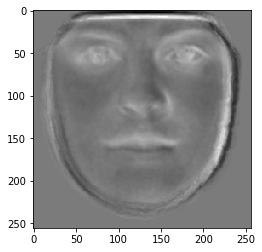

In [18]:
n = 10 # showing 10 images (full view)
for i in range(0,n):
    plotImg(k30[i])

In [19]:
def testReconstruction(test,k,mean,vh):
    w=np.dot(test, vh.T)
    return(mean + np.dot(w[:,0:k], vh[0:k,:]))

In [20]:
#test = testImg - mean
test = []
for imgs in range(0, len(testImg)):
    t = testImg[imgs]
    test.append([t[i] - mean[i] for i in range(0, 65536)])

In [21]:
n=1
m=5

For k=30, testing faces are as follows-


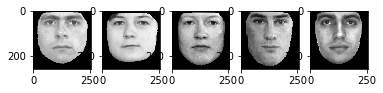

In [22]:
k=30
print("For k=30, testing faces are as follows-")
plotMultipleImgs(testImg,n,m) # Only printing 5 test images 

For k=30, reconstructed faces for above test images are as follows-


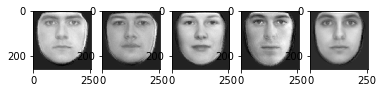

In [23]:
rec30 = testReconstruction(test,k,mean,vh)
##print(rec30)
##print(len(rec30))
##print(len(rec30[0]))
#print(len(rec30))
print("For k=30, reconstructed faces for above test images are as follows-")
plotMultipleImgs(rec30,n,m)

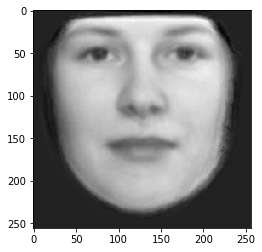

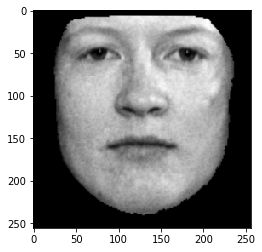

In [24]:
#Just showing one image in full view to see test as well as reconstruction image
plotImg(rec30[2])
plotImg(testImg[2])

For k=10, testing faces are given as follows-


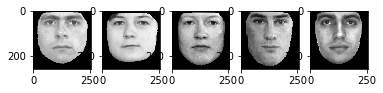

In [25]:
k=10
print("For k=10, testing faces are given as follows-")
plotMultipleImgs(testImg,n,m)

For k=10, reconstructed faces are given as follows-


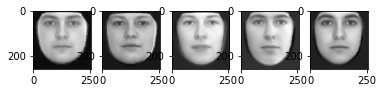

In [26]:
rec10 = testReconstruction(test,k,mean,vh)
##print(rec10)
print("For k=10, reconstructed faces are given as follows-")
plotMultipleImgs(rec10,n,m)

For k=50, testing faces are given as follows-


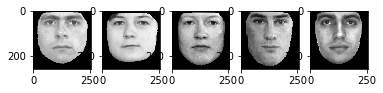

In [27]:
k=50
print("For k=50, testing faces are given as follows-")
plotMultipleImgs(testImg,n,m)

For k=50, reconstructed faces are given as follows-


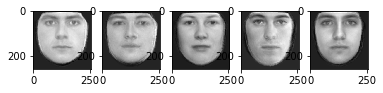

In [28]:
rec50 = testReconstruction(test,k,mean,vh)
##print(rec50)
print("For k=50, reconstructed faces are given as follows-")
plotMultipleImgs(rec50,n,m)

For k=100, testing faces are given as follows-


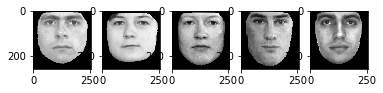

In [29]:
k=100
print("For k=100, testing faces are given as follows-")
plotMultipleImgs(testImg,n,m)

For k=100, reconstructed faces are given as follows-


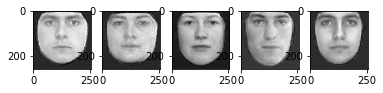

In [30]:
k=100
print("For k=100, reconstructed faces are given as follows-")
rec100 = testReconstruction(test,k,mean,vh)
##print(rec100)
plotMultipleImgs(rec100,n,m)

For k=150, testing faces are given as follows-


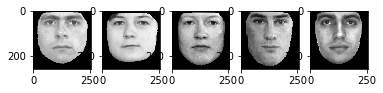

In [31]:
k=150
print("For k=150, testing faces are given as follows-")
plotMultipleImgs(testImg,n,m)

For k=150, reconstructed faces are given as follows-


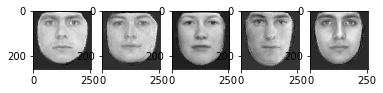

In [32]:
print("For k=150, reconstructed faces are given as follows-")
rec150 = testReconstruction(test,k,mean,vh)
##print(rec150)
plotMultipleImgs(rec150,n,m)

In [33]:
def error(test , rec):
    err = 0
    for i in range(0,20):
        numerator = np.linalg.norm(test[i]) - np.linalg.norm(rec[i]) #||Y-Ycap||
        err += (numerator**2)/20 
    return err

In [34]:
e10 = error(testImg , rec10)

In [35]:
e30 = error(testImg , rec30)

In [36]:
e50 = error(testImg , rec50)

In [37]:
e100 = error(testImg , rec100)
e150 = error(testImg , rec150)

In [38]:
print(e10,e30,e50,e100,e150)

256829.40780828887 130362.75020546108 110255.71777541471 85669.63393332255 70377.2494836844


In [39]:
errorList = []
k= []
for i in range(0,200):
    recc = testReconstruction(test, i, mean, vh)
    errorList.append(error(testImg , recc))
    k.append(i)
#print(errorList)

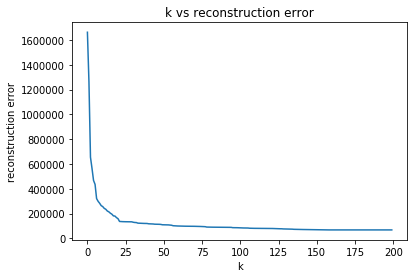

In [40]:
y = np.sort(errorList)
r = y[::-1]
plt.plot(k,r)

plt.xlabel('k')
plt.ylabel('reconstruction error')
plt.title('k vs reconstruction error')

plt.show()